# Visualizations

In this notebook we work on visualizations for the Sampling Bayesian Encoder

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import sklearn
%matplotlib inline

In [11]:
#Load all results
with open('classification_search1.pickle', 'rb') as f:
    class_loo_results = pickle.load(f)
with open('classification_search2.pickle', 'rb') as f:
    class_draws_results = pickle.load(f)
with open('classification_search3.pickle', 'rb') as f:
    class_prior_results = pickle.load(f)    
    
with open('hastie_search1.pickle', 'rb') as f:
    hastie_loo_results = pickle.load(f)
with open('hastie_search2.pickle', 'rb') as f:
    hastie_draws_results = pickle.load(f)
with open('hastie_search3.pickle', 'rb') as f:
    hastie_prior_results = pickle.load(f)    

In [46]:
def plot_results(results, xlabel, ylabel, filename=None, transform=None):
    param_values = [val[list(val.keys())[0]] for val in results['params']]
    if transform:
        param_values = [transform(val) for val in param_values]
    plt.plot(param_values, results['mean_test_score'], 'b-o')
    plt.fill_between(param_values, results['mean_test_score'] - results['std_test_score'],
                 results['mean_test_score'] + results['std_test_score'], color='lightgrey')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if filename:
        plt.savefig(filename)
    plt.show();

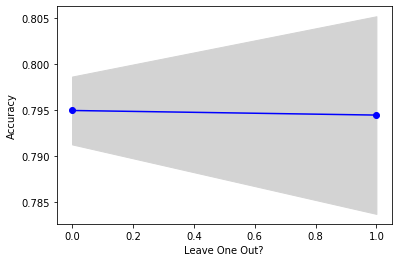

In [47]:
plot_results(class_loo_results, 'Leave One Out?', 'Accuracy', filename='class_loo.png');

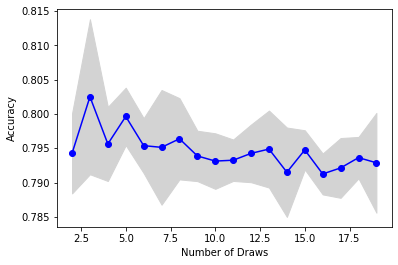

In [48]:
plot_results(class_draws_results, 'Number of Draws', 'Accuracy', filename='class_draws.png');

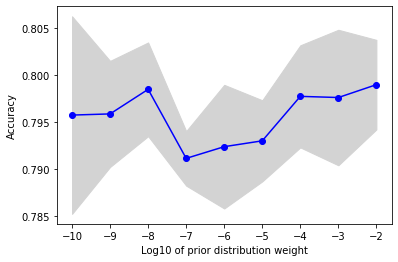

In [49]:
from math import log10
plot_results(class_prior_results, 'Log10 of prior distribution weight', 'Accuracy', transform=log10, 
             filename='class_prior.png');

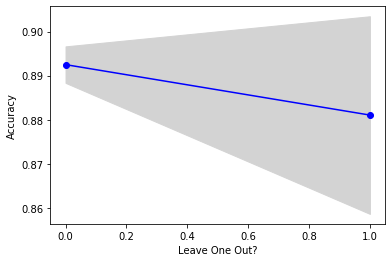

In [51]:
plot_results(hastie_loo_results, 'Leave One Out?', 'Accuracy');

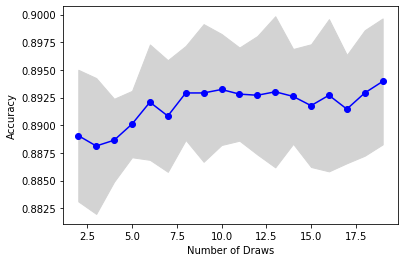

In [50]:
plot_results(hastie_draws_results, 'Number of Draws', 'Accuracy', filename='hastie_draws.png');

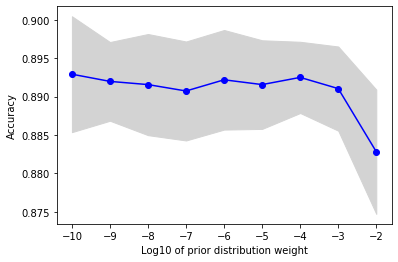

In [52]:
plot_results(hastie_prior_results, 'Log10 of prior distribution weight', 'Accuracy', 
             transform=log10, filename='hastie_prior.png');

## Feature importances

In [53]:
with open('class_loo_import.pickle', 'rb') as f:
    loo_imp = pickle.load(f)
with open('class_sam_import.pickle', 'rb') as f:
    sam_imp = pickle.load(f)

In [60]:
df_loo = pd.DataFrame()
df_loo['Feature Importance'] = loo_imp
df_loo['Encoder'] = 'Target Encoder'
df_loo = df_loo.reset_index().rename(columns={'index': 'Feature'})
df_loo

,Feature,Feature Importance,Encoder
0,0,0.054971,Target Encoder
1,1,0.143881,Target Encoder
2,2,0.128160,Target Encoder
3,3,0.144825,Target Encoder
4,4,0.051314,Target Encoder
5,5,0.201511,Target Encoder
6,6,0.051581,Target Encoder
7,7,0.050833,Target Encoder
8,8,0.065752,Target Encoder
9,9,0.107171,Target Encoder


In [69]:
df_sam = pd.DataFrame()
df_sam['Feature Importance'] = sam_imp
df_sam['Encoder'] = 'Sampling Bayesian Encoder'
df_sam = df_sam.reset_index().rename(columns={'index': 'Feature'})
df_sam

,Feature,Feature Importance,Encoder
0,0,0.057760,Sampling Bayesian Encoder
1,1,0.176828,Sampling Bayesian Encoder
2,2,0.147223,Sampling Bayesian Encoder
3,3,0.162812,Sampling Bayesian Encoder
4,4,0.053030,Sampling Bayesian Encoder
5,5,0.228263,Sampling Bayesian Encoder
6,6,0.053329,Sampling Bayesian Encoder
7,7,0.052302,Sampling Bayesian Encoder
8,8,0.014320,Sampling Bayesian Encoder
9,9,0.054132,Sampling Bayesian Encoder


In [70]:
df_combined = pd.concat([df_loo, df_sam], axis=0)
df_combined

,Feature,Feature Importance,Encoder
0,0,0.054971,Target Encoder
1,1,0.143881,Target Encoder
2,2,0.128160,Target Encoder
3,3,0.144825,Target Encoder
4,4,0.051314,Target Encoder
5,5,0.201511,Target Encoder
6,6,0.051581,Target Encoder
7,7,0.050833,Target Encoder
8,8,0.065752,Target Encoder
9,9,0.107171,Target Encoder


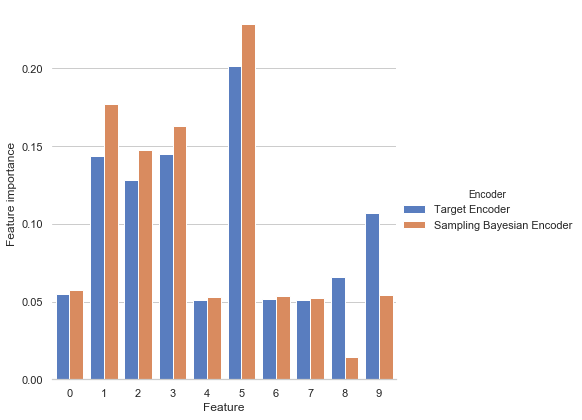

In [73]:
import seaborn as sns
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Feature", y="Feature Importance", hue="Encoder", data=df_combined,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Feature importance")
plt.savefig('importances.png')